In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def obj_func(m):
    u, s, vh = np.linalg.svd(m)

    return np.sum(s[1:])

epsilon = 1e-6

def comp_grad(m, boolMask, obj_func, n):
    """ Computes gradient that maximizes the objective function """

    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))

    return grad

def comp_hessian(m, boolMask, of, n):
    """ Computes hessian (only diagonal) """
    vector = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                vector.append(m[i,j])

    q = len(vector)
    hessian = np.zeros([q, q])

    # fill in the diagonal first
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:

                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian[count,count] = (of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2

                count = count + 1
                
    # now fill in off-diagonals
    count1 = 0
    for i1 in range(n):
        for j1 in range(n):
            if boolMask[i1,j1]: # found one
                diff1 = np.zeros([n,n])
                diff1[i1,j1] = epsilon

                count2 = 0
                for i2 in range(n):
                    for j2 in range(n):
                        if boolMask[i2,j2]: # found another one
                            diff2 = np.zeros([n,n])
                            diff2[i2,j2] = epsilon

                            if count1 != count2: # doing only off-diagonal ones
                                hessian[count1,count2] = (of(m + diff1 + diff2) + of(m - diff1 - diff2)
                                                         - of(m + diff1 - diff2) - of(m - diff1 + diff2))/(2*epsilon)**2

                            count2 = count2 + 1

                count1 = count1 + 1

    return hessian

In [3]:
n = 10
p = 0.5
rank = 1

U = np.random.randn(n, rank)
V = np.random.randn(n, rank)
original = np.dot(U, V.T)
mask = np.random.choice([0, 1], size=(n,n), p=[1-p, p])

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))

In [4]:
current_point = np.copy(original)

zeros = np.zeros([n,n])
current_point[boolMask] = zeros[boolMask]

print("step, nuc norm, frob distance, hessian cond")#, grad mean, grad std, grad min, grad max")
nuc_norms = []
frob_norms = []
conds = []

for step in range(10000):

    hessian = comp_hessian(current_point, boolMask, obj_func, n)
    grad = comp_grad(current_point, boolMask, obj_func, n)

    #descent = -np.dot(np.linalg.inv(hessian), grad)
    descent = -np.array(grad)
    
    descent_matrix = np.zeros([n,n])
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                descent_matrix[i,j] = descent[count]
                count = count + 1
    
    current_point = current_point + 0.1*descent_matrix
    
    nuc_norms.append(np.linalg.norm(current_point,'nuc'))
    frob_norms.append(np.linalg.norm(current_point-original,'fro'))
    conds.append(np.linalg.cond(hessian))
    
    if step % 20 == 0:
        print(step, np.linalg.norm(current_point,'nuc'), np.linalg.norm(current_point-original,'fro'),
              np.linalg.cond(hessian))#, np.mean(np.abs(grad)),
             # np.std(np.abs(grad)), np.min(np.abs(grad)), np.max(np.abs(grad)))
    

step, nuc norm, frob distance, hessian cond
0 20.46314425418174 12.48324062178931 26237.827166501436
20 18.371716705992185 10.481248837522735 26655.384812529297
40 17.45740137264849 8.580114202939102 8876.080973846068
60 16.795170342205076 6.81042519665634 11330.206990935541
80 16.43100151593427 5.212041004794902 91282.51523442914
100 16.197631763829463 3.8405884164094277 21592.33432995296
120 16.173792767919814 2.738320994069682 122490.62573017782
140 16.17786837186181 1.7810577719314948 143832.28238651674
160 16.227187152348698 0.9176668771505474 974621.5578891457
180 16.36954137526762 0.2593790423188467 309604.33750241005
200 16.428352964803356 0.1840243962246144 337326.5150178834
220 16.43919592772514 0.18009647246609733 363125.5544081839
240 16.44093865285855 0.17822279981731096 266848.0060382424
260 16.44111273381962 0.17691916694669355 824783.6860705642
280 16.441146737810126 0.175905345172612 556414.7261228045
300 16.44118416889435 0.17506466107478566 124873.88336585609
320 16.

KeyboardInterrupt: 

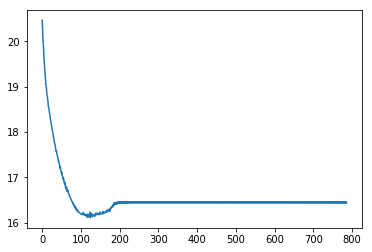

In [5]:
plt.plot(nuc_norms)

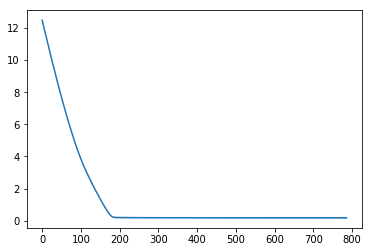

In [6]:
plt.plot(frob_norms)

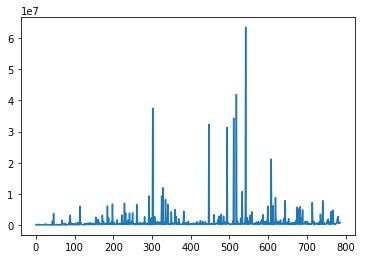

In [7]:
plt.plot(conds)

(array([607.,  90.,  20.,  16.,  10.,   9.,   5.,   3.,   2.,   5.,   4.,
          1.,   3.,   1.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.57306628e+03, 6.37837831e+05, 1.27310259e+06, 1.90836736e+06,
        2.54363212e+06, 3.17889689e+06, 3.81416165e+06, 4.44942642e+06,
        5.08469118e+06, 5.71995594e+06, 6.35522071e+06, 6.99048547e+06,
        7.62575024e+06, 8.26101500e+06, 8.89627977e+06, 9.53154453e+06,
        1.01668093e+07, 1.0802

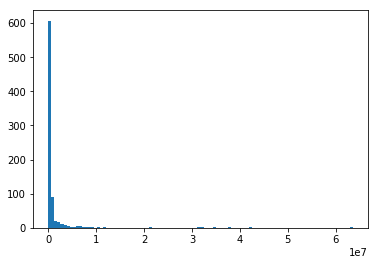

In [10]:
plt.hist(conds,100)